#EasyVisa Project

###**Context:**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.



###**Objective:**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

###**Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status: Flag indicating if the Visa was certified or denied

In [41]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.ensemble import (BaggingClassifier,RandomForestClassifier, 
                              GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = "/content/drive/MyDrive/EasyVisa.csv" 
df = pd.read_csv(df)
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
evisa = df.copy()

In [ ]:
evisa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
evisa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
evisa.shape

(25480, 12)

* There are 25480 observations and 12 columns in the dataset

In [ ]:
evisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are no missing values in the data.
* Not all the features are numeric types, so they should be converted to categories. 
* Case ID will need to be dropped.

In [5]:
for col in df.columns[evisa.dtypes=='object']:
    evisa[col] = evisa[col].astype('category')

In [ ]:
evisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* As shown above tye data has two inte64, one float and nine category datatypes.

In [6]:
evisa.drop(labels='case_id', axis=1, inplace=True)

* case Id is dropped.

#**Exploratory Data Analysis (EDA)**

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

##**Univariate Analysis**

**1. Continent**

In [ ]:
evisa['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

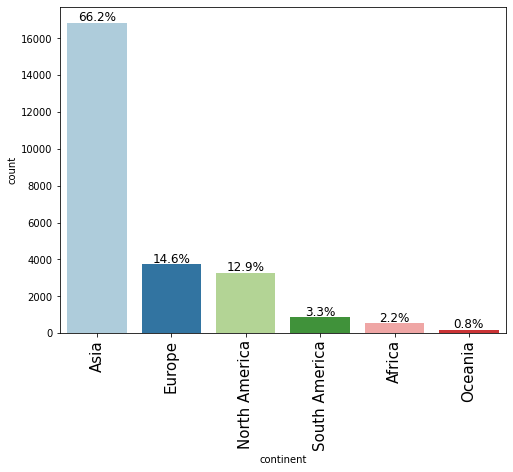

In [ ]:
labeled_barplot(evisa,"continent", perc=True)

* Asia has the largest number of employees with 16861 while oceania has the least with only 192 employees.

**2. education_of_employee**

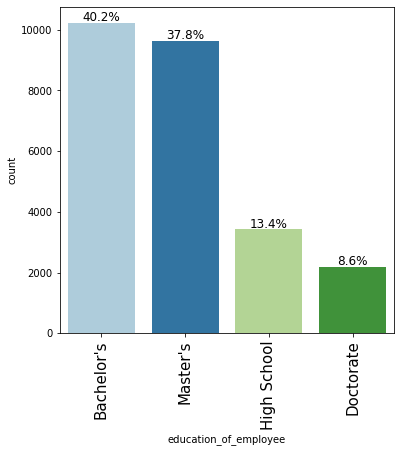

In [ ]:
labeled_barplot(evisa,"education_of_employee", perc=True)

In [ ]:
evisa['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

* Most of the employess have bachelor's degree. Only about 8.6% of the employees have Doctorate degree.

**3. has_job_experience**

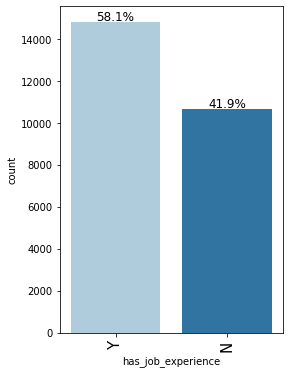

In [ ]:
labeled_barplot(evisa,"has_job_experience", perc=True)

In [ ]:
evisa['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

* A little more than half of the employees have job experience while about 41.9% do not any exprience.

**4. requires_job_training**

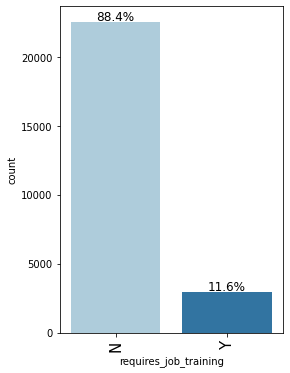

In [ ]:
labeled_barplot(evisa,"requires_job_training", perc=True)

In [ ]:
evisa['requires_job_training'].value_counts()

N    22525
Y     2955
Name: requires_job_training, dtype: int64

* Most of the employees do not require job training

**5. no_of_employees:**

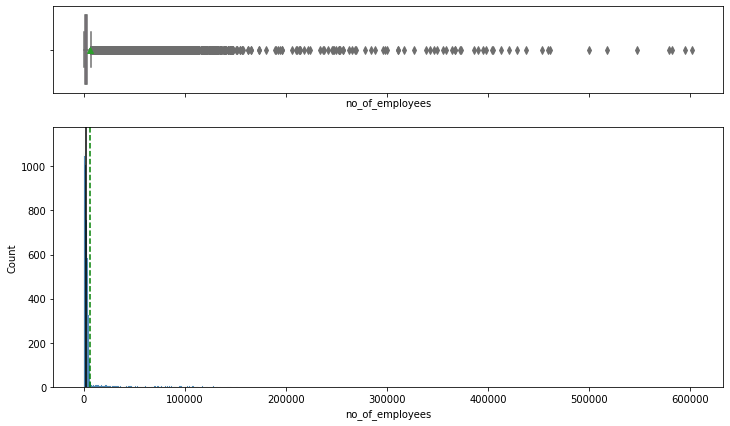

In [ ]:
histogram_boxplot(evisa, 'no_of_employees')

* We can observe that the graph is right skewed.

**6. yr_of_estab**

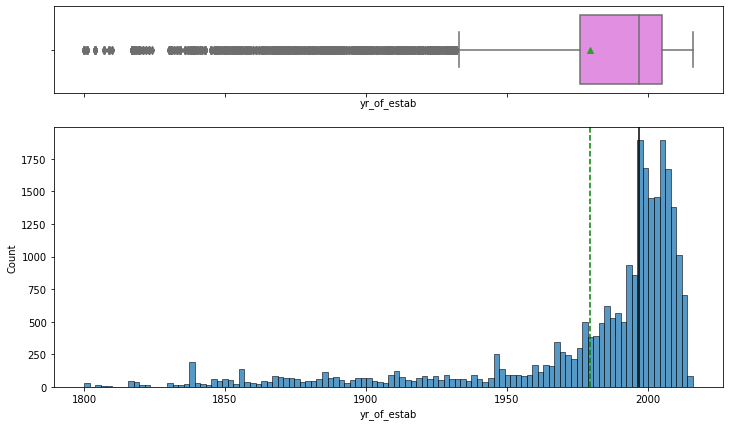

In [ ]:
histogram_boxplot(evisa, 'yr_of_estab')

* We can observe that the graph is left skewed. 
* Since it is heavly skewed, the outliers might need to be treated.

**7. region_of_employment**

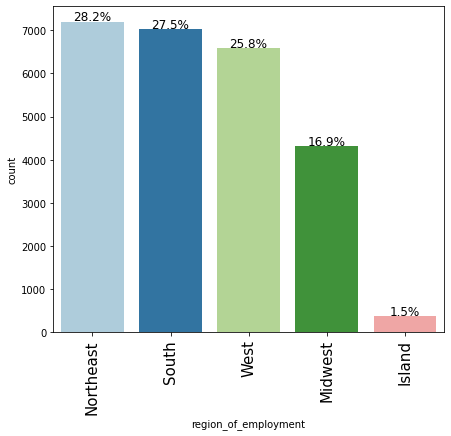

In [ ]:
labeled_barplot(evisa,"region_of_employment", perc=True)

In [ ]:
evisa['region_of_employment'].value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

* A high number of foregin workers intended to work in the northeast part of the US while

**8. prevailing_wage**

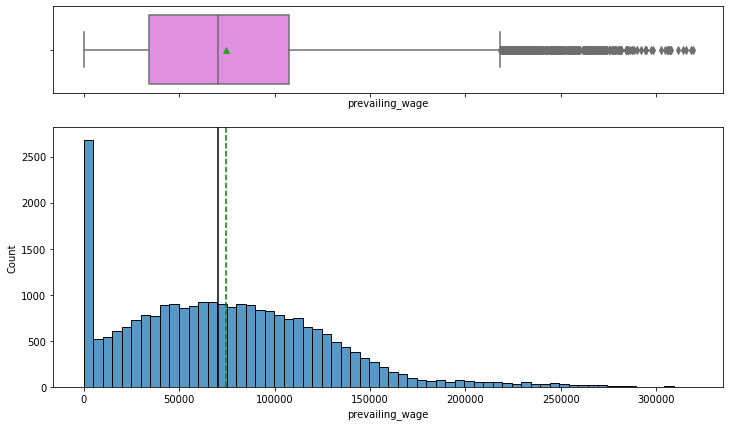

In [ ]:
histogram_boxplot(evisa, 'prevailing_wage')

* We can observe that the graph is right skewed.
* The wage ranges from 2$ to 319210$.

**9. unit_of_wage**

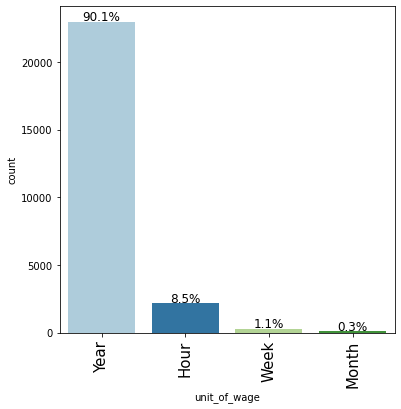

In [ ]:
labeled_barplot(evisa,"unit_of_wage", perc=True)

In [ ]:
evisa['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

* 90% of wage paid by company are hourly while less than 1% are paid monthly.

**10. full_time_position**

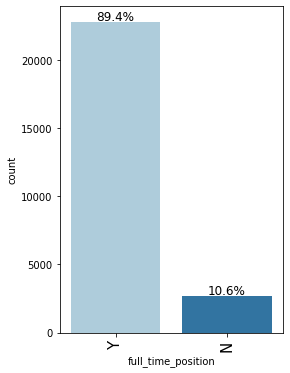

In [ ]:
labeled_barplot(evisa,"full_time_position", perc=True)

In [ ]:
evisa['full_time_position'].value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64

* Most jobs requires full time position.

**11.case_status**

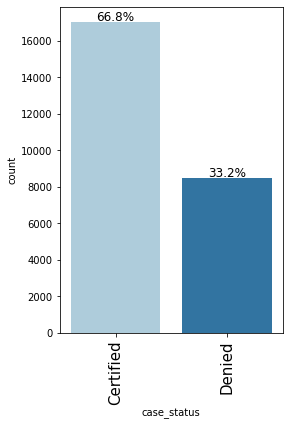

In [ ]:
labeled_barplot(evisa,"case_status", perc=True)

In [ ]:
evisa['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

* Among the visa applications, 66.8% are approved. which is almost double the number od cases that are denied.

###**Leading Questions:**

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

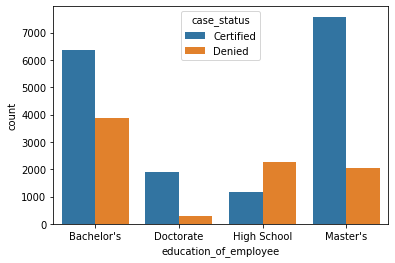

In [ ]:
sns.countplot(data=evisa, x='education_of_employee',hue='case_status')

In [ ]:
evisa.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee           
Bachelor's             Certified    6367
                       Denied       3867
Doctorate              Certified    1912
                       Denied        280
High School            Denied       2256
                       Certified    1164
Master's               Certified    7575
                       Denied       2059
Name: case_status, dtype: int64

* As shown above, the more educated an employee is, the less probability of of being denied. 
* Highschool level educated workers tend to be denied more time than certified. while Doctrate level workers tend to be certified more than being denined.

**2. How does the visa status vary across different continents?**



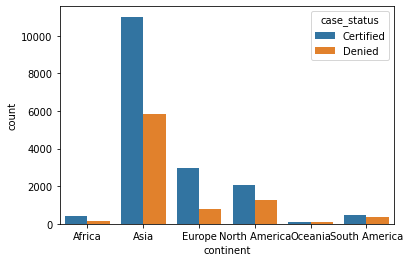

In [ ]:
sns.countplot(data=evisa, x='continent', hue='case_status')

In [ ]:
 evisa.groupby('continent')['case_status'].value_counts()

continent               
Africa         Certified      397
               Denied         154
Asia           Certified    11012
               Denied        5849
Europe         Certified     2957
               Denied         775
North America  Certified     2037
               Denied        1255
Oceania        Certified      122
               Denied          70
South America  Certified      493
               Denied         359
Name: case_status, dtype: int64

* European applicants have better chance of getting dertified than being denied.
* Asia has the most applicant which in result has the most certified and denied cases. 

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

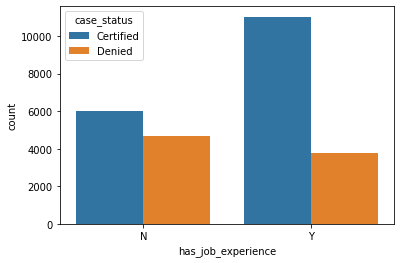

In [ ]:
sns.countplot(data=evisa, x='has_job_experience', hue='case_status')

In [ ]:
evisa.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience           
N                   Certified     5994
                    Denied        4684
Y                   Certified    11024
                    Denied        3778
Name: case_status, dtype: int64

* Applicants with privious job exprience have a high chance of getting certified compared to those with no exprience. 

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

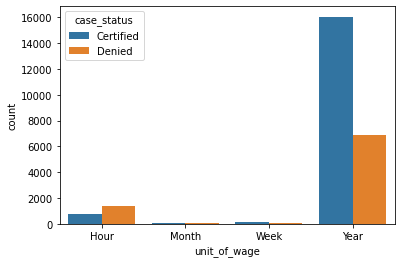

In [ ]:
sns.countplot(data=evisa, x='unit_of_wage', hue='case_status')

In [ ]:
evisa.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage           
Hour          Denied        1410
              Certified      747
Month         Certified       55
              Denied          34
Week          Certified      169
              Denied         103
Year          Certified    16047
              Denied        6915
Name: case_status, dtype: int64

* Annualy paid employees have the highest both certified and denied case status. This might suggest that employers wants workers who are paid annuanly comprared to the other types of unit of wage.

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

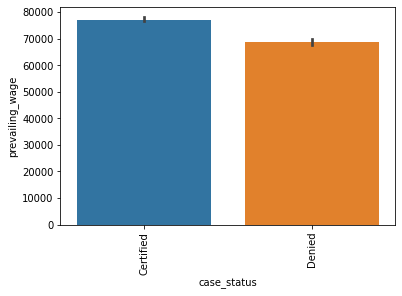

In [ ]:
plt.figure()
sns.barplot(data=evisa, x="case_status", y="prevailing_wage")
plt.xticks(rotation=90)
plt.show()

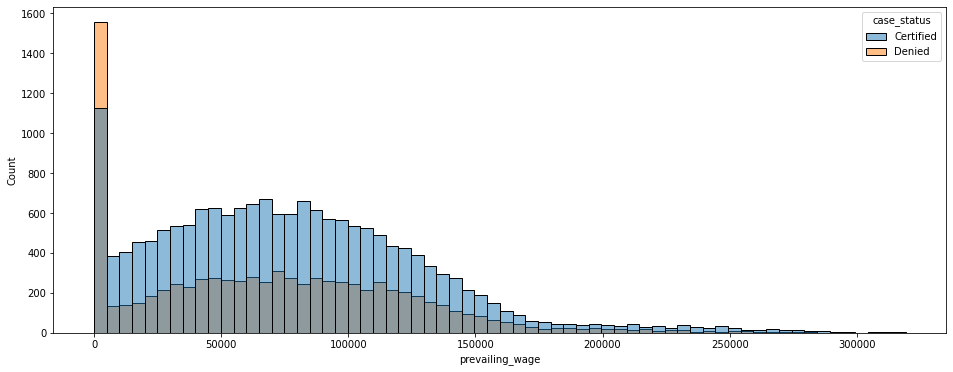

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(data=evisa, x='prevailing_wage', hue='case_status')
plt.show()

As the distribution above shows, the ratio of approved to denied applications remains approximately equivalent across the range of wage

#**Bivariate Analysis**

**1. Continent and Case Status**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


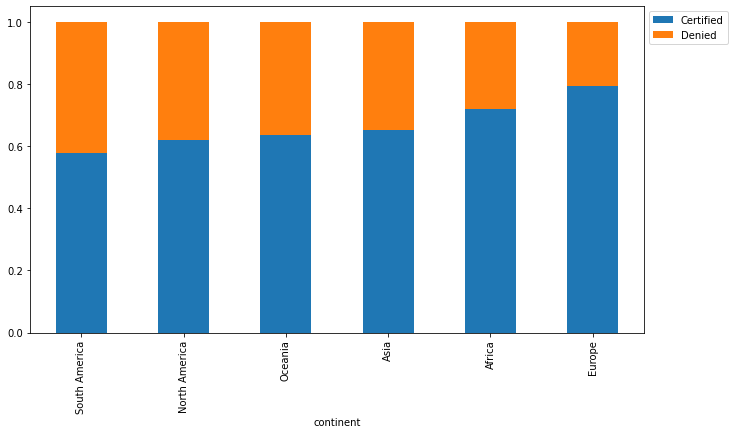

In [ ]:
stacked_barplot(evisa,'continent','case_status')

* Europe has the highest visa certification rate while south america has the lowest.

**2. Education and case status**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


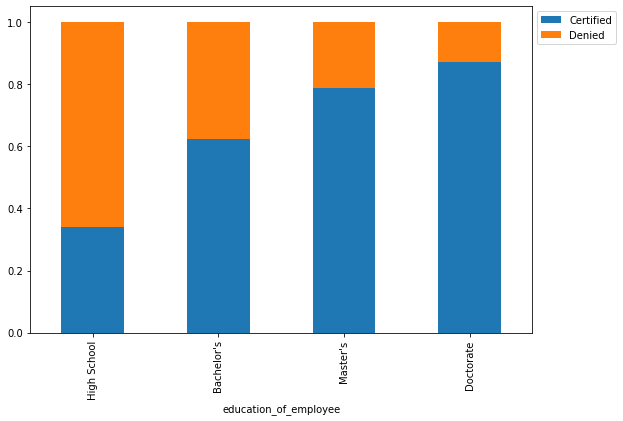

In [ ]:
stacked_barplot(evisa,'education_of_employee','case_status')

* The height the educational level, the better chance of getting certified to work in the US.

**3. Job exprience and case status**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


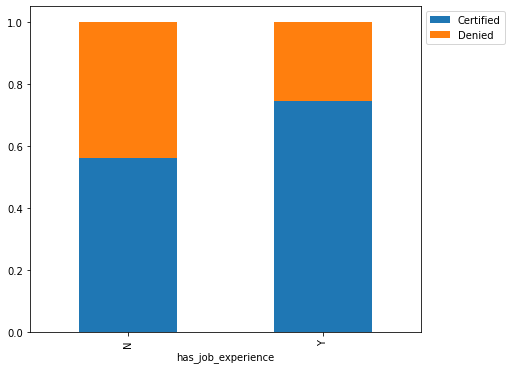

In [ ]:
stacked_barplot(evisa,'has_job_experience','case_status')

* Workers with jo experience have a higher chnace of getting certified than workers with no job experience.

**4.Required job training and case status**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


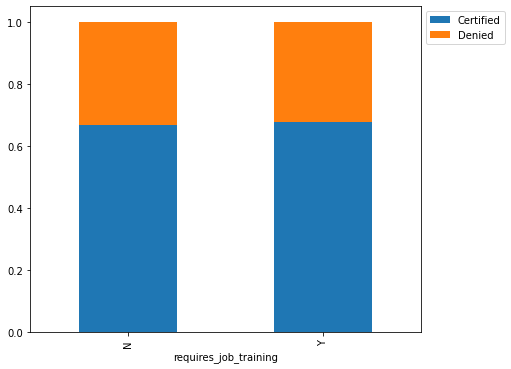

In [ ]:
stacked_barplot(evisa,'requires_job_training','case_status')

* Case status is not affected by training requirement.

**5. Region of employment**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


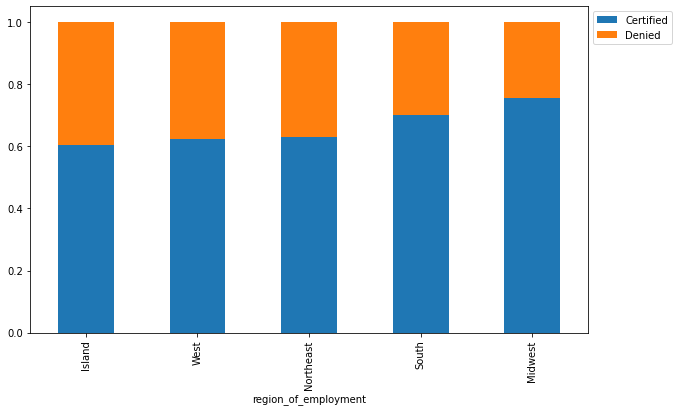

In [ ]:
stacked_barplot(evisa,'region_of_employment','case_status')

* Midwest region has the highest rate of certifing workers and island region have the lowest.

**6. Full time position**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


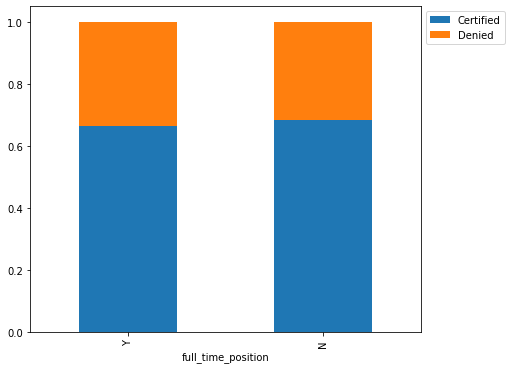

In [ ]:
stacked_barplot(evisa,'full_time_position','case_status')

* Case status is not affected by full time position.

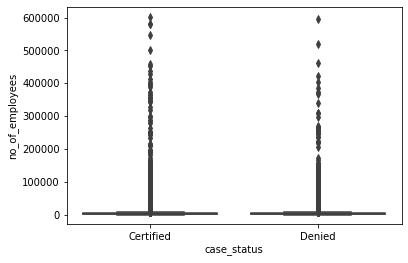

In [ ]:
sns.boxplot(data=evisa, y='no_of_employees' , x='case_status')

* Seems like number of employees has insignififcant effects on case status.

#**Data Preprocessing**

In [7]:
easyvisa = evisa.copy()

###**Missing value treatment**

In [ ]:
evisa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* The minimum value of no_of_employees is -26, which is odd. The negative values should be treated as missing values and will be replaced by the median.

In [8]:
evisa[evisa.no_of_employees<0].shape

(33, 11)

* 33 number of raws have negative number of employees

In [9]:
neg_employee = easyvisa.no_of_employees <= 0
easyvisa.loc[neg_employee, "no_of_employees"] = easyvisa.no_of_employees.median()
easyvisa.no_of_employees.min()

12

* Now, the negative values have been replaced by the median value and the minimun number of employees is 12.

###**Detection of outliers**

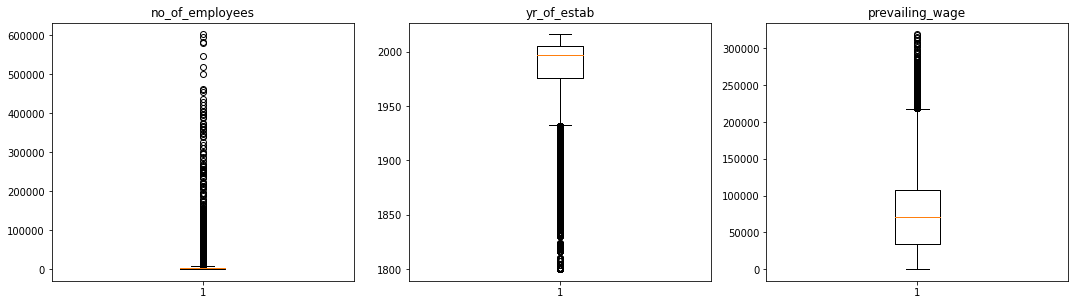

In [ ]:
plt.figure(figsize=(20, 20))
numeric_columns = easyvisa.select_dtypes(include=np.number).columns.tolist()
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(easyvisa[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There seems to be outlierners but we have to group the values and observe if it should be treated

###**Creating new columns with actual values and data types**

* Grouping number of employees for further simplication and to konw thw capacity of the companies

In [10]:
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
easyvisa['employee_no'] = pd.cut(df['no_of_employees'], bins, labels=names)
easyvisa.employee_no.value_counts()

0-1000       6208
1000-2000    5915
2000-3000    4978
4000+        4798
3000-4000    3548
Name: employee_no, dtype: int64

* Creating a new column that detailes the number of years the company has been in business.

In [11]:
bins2 = [0,1966,1986,1996,2006,np.Inf]
names = ['0-10','10-20','20-30','30-50','50+']
easyvisa['yrs_in_business'] = pd.cut(easyvisa['yr_of_estab'], bins2, labels=names)
easyvisa.yrs_in_business.value_counts()

30-50    8378
0-10     5109
50+      4856
10-20    3746
20-30    3391
Name: yrs_in_business, dtype: int64

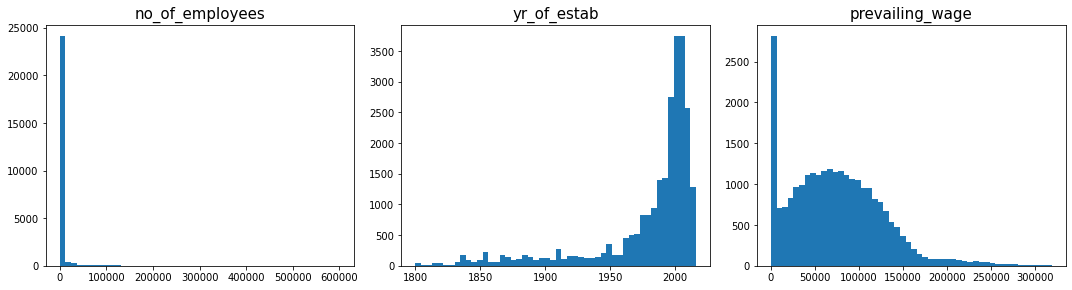

In [ ]:
easyvisa_numcols = [
    item for item in easyvisa.select_dtypes(include=np.number).columns 
]

plt.figure(figsize=(15, 45))

for i in range(len(easyvisa_numcols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(easyvisa[easyvisa_numcols[i]], bins=50)
    plt.tight_layout()
    plt.title(easyvisa_numcols[i], fontsize=15)

plt.show()

* I believe the outliers in these features are important, so i will not be treating them. as a result, i will drop number of employees and years of estab.

###**Data Preparation for Modeling**

In [12]:
easyvisa = easyvisa.drop(labels=['no_of_employees','yr_of_estab'], axis=1, inplace=True)

**Encoding Categorical Data**

In [13]:
evisa["case_status"] = evisa["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

**Spliting the data**

In [14]:
X = evisa.drop('case_status',axis=1)
Y = evisa['case_status']
X = pd.get_dummies(X, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [15]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
 
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
 
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


####**Model evaluation criterion**

**The model can make wrong predictions as:**

1. Predicting an applicant will be certified when the applicant is denied.
2. Predicting an applicant will be denied when the applicant is certified.

**Which case is more important?**
* They are both important
  * Predicting an applicant will be certified when the applicant is denied will result in a waste time and resources.
  * Predicting an applicant will be denied when the applicant is certified will denay a work opportunity for a qualied person to work in the US. 

**Which metric to optimize?**

* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

In [16]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """


    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  


    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [17]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###**Decision Tree - Model Building and Hyperparameter Tuning**

**Decision Tree**

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66248  0.745658   0.753804  0.749709


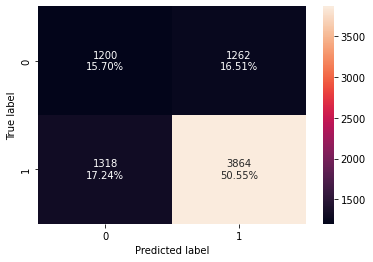

In [18]:
d_tree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
d_tree.fit(x_train, y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,x_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,x_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,x_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves

**Hyperparameter Tuning**

In [19]:
dtree_estimator = DecisionTreeClassifier(random_state=1)


parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.725275  0.908837   0.737893  0.814492
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733386  0.907758   0.750958  0.821947


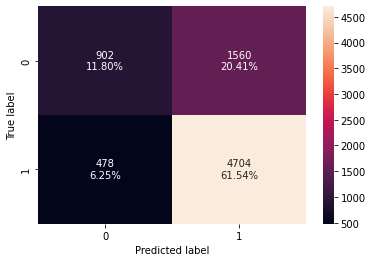

In [20]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,x_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,x_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)


confusion_matrix_sklearn(dtree_estimator,x_test,y_test)

* The tuned decision tree model has performed well.
* The F1-score for the test set has been increased from 0.74 for the initial model to 0.82 
 

###**Bagging - Model Building and Hyperparameter Tuning**

**Random Forest Classifier**

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999888     1.0   0.999831  0.999916
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72763  0.834427    0.77938  0.805965


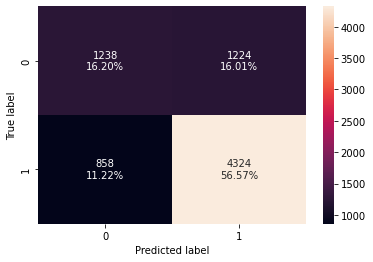

In [21]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)


rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,x_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,x_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)


confusion_matrix_sklearn(rf_estimator,x_test,y_test)

This Random Forest is overfitting to the training dataset and has F1 score approxiatly 1 which is high.

**Hyperparameter Tuning**

In [23]:
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.6000000000000001,
                       min_samples_leaf=8, min_samples_split=3, n_estimators=30,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.769119  0.895657   0.786191  0.837362
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747253  0.879197   0.777209  0.825063


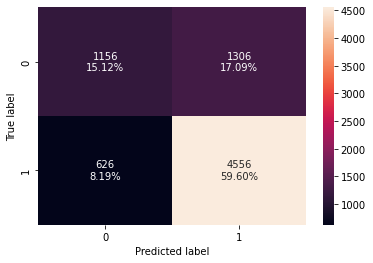

In [24]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,x_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,x_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,x_test,y_test)


* The Random Forest after tuning is equal training and testing datasets showing that the model is not overfitting.
* The f1 score on the test data, after tuning, has increased.


**Bagging Classifier**

   Accuracy   Recall  Precision        F1
0  0.984245  0.98513   0.991075  0.988094
   Accuracy   Recall  Precision        F1
0  0.696232  0.77364   0.777239  0.775435


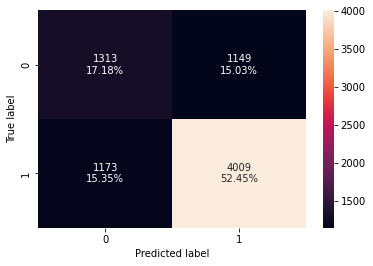

In [25]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(x_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,x_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,x_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,x_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

**Hyperparameter Tuning**

In [33]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' :  np.arange(50, 100, 10)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=90,
                  random_state=1)

   Accuracy  Recall  Precision        F1
0  0.999215     1.0   0.998819  0.999409
   Accuracy    Recall  Precision       F1
0  0.733647  0.878039   0.764192  0.81717


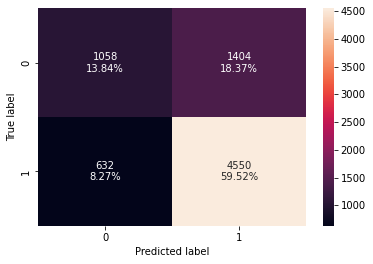

In [34]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,x_test,y_test)

* This model is still overfitting but the f1 score have increased.

###**Boosting - Model Building and Hyperparameter Tunin**g

####**AdaBoost Classifier**

   Accuracy    Recall  Precision        F1
0  0.737329  0.886617   0.758401  0.817513
   Accuracy    Recall  Precision        F1
0  0.737572  0.885565   0.764578  0.820637


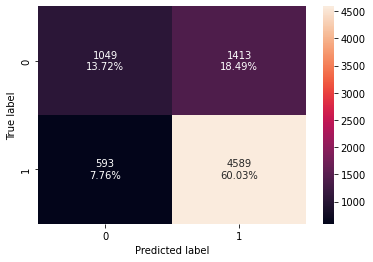

In [31]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,x_test,y_test)

* The training and test data sets are very close. The testing data has a fair f1 score.
* Even though it is not overfitting, tuning it might help with the model's performance.

**Hyperparameter Tuning**

In [43]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_


# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.8, n_estimators=10, random_state=1)

   Accuracy   Recall  Precision        F1
0  0.745515  0.88442   0.767505  0.821825
   Accuracy    Recall  Precision        F1
0  0.747122  0.879776   0.776793  0.825084


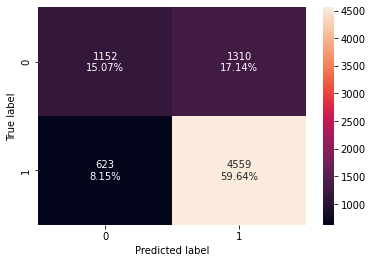

In [44]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,x_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,x_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

* There was not a significant improvement observed in this model. 
* The training data's fi score seems to have dropped a little.

####**Gradient Boosting Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756279  0.875549   0.782881  0.826626
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.751177  0.86704   0.787417  0.825312


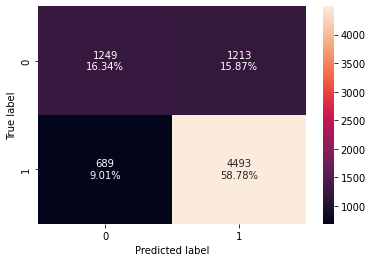

In [36]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,x_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,x_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,x_test,y_test)

* This model seems to perform well on both the training and test data.
* It does not show overfitting.
* The F1-score for both training and test data sets is above 0.82.

**Hyperparameter Tuning**

In [48]:
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150,2000,250,300],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.4, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)


rand_gb = RandomizedSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)
gbc_tuned = rand_gb.best_estimator_
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=1, n_estimators=250, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.751682  0.879267   0.776236  0.824545
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749215  0.873601      0.782  0.825267


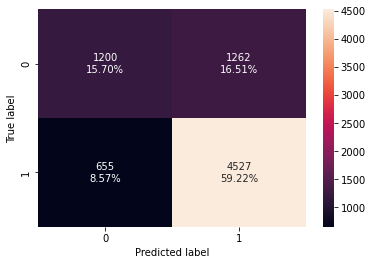

In [49]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,x_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,x_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

* The tuning did not improve the performace
* This model seems to perform well on both the training and test data.
* It does not show overfitting.


####**XGBoost Classifier**

Training performance:
    Accuracy    Recall  Precision       F1
0  0.754597  0.873437   0.782174  0.82529
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749608  0.865496   0.786566  0.824146


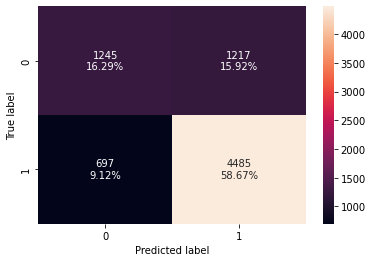

In [51]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(x_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,x_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,x_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,x_test,y_test)

* The model is not overfitting even though the training data is performing better that the testing data.

**Hyperparameter Tuning**

In [52]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')


parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.5,
              eval_metric='logloss', n_estimators=70, random_state=1,
              subsample=0.7)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.750617  0.876732   0.776373  0.823506
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749869  0.872057    0.78346  0.825388


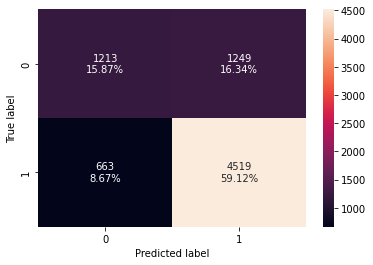

In [53]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,x_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,x_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,x_test,y_test)

* The model's performance on the test set was improved slightly via tuning, increasing the F1-score from 0.824 to 0.825
* But overall, the model have similar peformace.

####**Stacking Model**

In [54]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(x_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features='sqrt',
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=8,
                                                       min_samples_split=3,
                                                       n_estimators=30,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_features=1,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=5,
                     

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757008  0.878675   0.782072  0.827564
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748168  0.870127   0.782677  0.824088


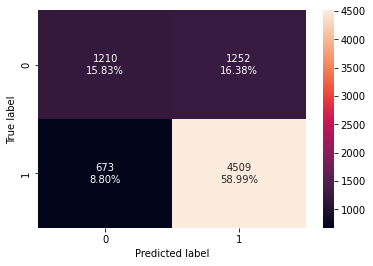

In [55]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,x_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,x_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,x_test,y_test)

* The stacking classifier is giving a slightly similar performance as compared to XGBoost with slightly less overfitting
* The F1 score in both models is 0.824

###**Comparing all models**

In [56]:
models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.725275,0.999888,0.769119,0.984245,0.999215,0.737329,0.745515,0.756279,0.751682,0.754597,0.750617,0.757008
Recall,1.0,0.908837,1.000000,0.895657,0.985130,1.000000,0.886617,0.884420,0.875549,0.879267,0.873437,0.876732,0.878675
Precision,1.0,0.737893,0.999831,0.786191,0.991075,0.998819,0.758401,0.767505,0.782881,0.776236,0.782174,0.776373,0.782072
F1,1.0,0.814492,0.999916,0.837362,0.988094,0.999409,0.817513,0.821825,0.826626,0.824545,0.825290,0.823506,0.827564


* The majority of the models such as Decision Tree, Bagging, Tuned Bagging, and Random Forest estimator are overfitting the training data in terms of f1-score.
* The remaining models perform almost similarly in terms of F1-score.
* The base Gradient Boosting classifier performs the best on the testing dataset, with an 0.83 F1 score.

####**Feature importance of Gradient Boosting Classifier**

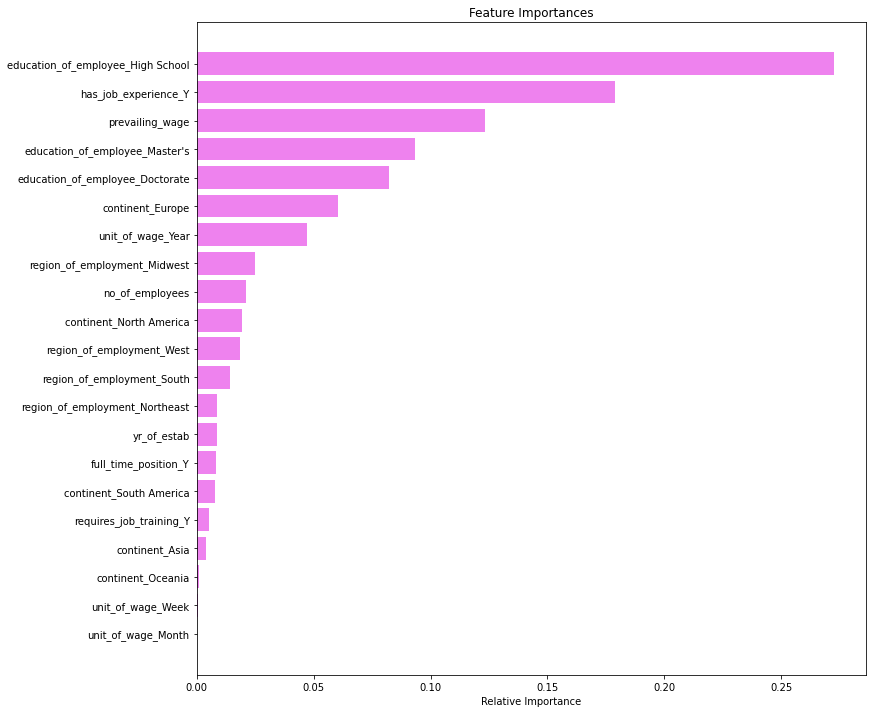

In [58]:
feature_names = x_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###**Actionable Insights and Recommendations**

####**Insights** 
* As shown above, three most critical components for pre-screening an applicant are:
1.  Education level : to be specific at least a highschool diploma. The more educated an applicant is, the higher probablity of getting visa certification.
2. Previous job experience: If an applicant has a previous job experience, chances are the applicant will be visa certified.
3. Prevailing wage : 
The higher the prevailing wage of the job, the more likely the applicant will be visa certified, to specific for hourly wage.
* Location wise, European  applicants have the highest chances of visa certification.
* Applications to work in the Midwest region are more likely to be certified than the applications for the employment in other regions.
* Surprisingly, full time position is not that of importance comapred to other factors for certification





###**Recommendations** 

* The Gradient Boosting classifier performs the best of all the models, so this model is recommended.
* From the above model, OFLC can can processs visa certification application based on level of education, wage and job experience. 
  * Applicant who satisfy the above recommended requirements should be given priority. 
  * This can limit the amount of time and resources needed to approve employees coming to the US. 
* The OFLC should also specifiy the types of jobs that requires addition foregin employees to come and work in the US. 
  * This can help target the employees and limit the time to process the visa application as man power is needed in the country.